In [64]:
import numpy as np
import pandas as pd
from scipy.optimize import nnls
from matplotlib import pyplot as plt
from scipy.stats import norm,rv_continuous

In [61]:
# import os
# os.getcwd()

In [62]:
data=pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\ms.csv")
aa={'A':5,'C':2,'D':2,'E':5,'F':1,'G':2,'H':3,'I':1,'K':4,'L':1,'M':1,'N':2,'P':3,
'Q':5,'R':2,'S':3,'T':0,'V':1,'W':0,'Y':1}

In [69]:
print(
max(data['PeptidesPassedNEHfilters.T_NEH']),
np.median(data['PeptidesPassedNEHfilters.T_NEH'] -data['PeptidesPassedNEHfilters.APE_NEH']),
np.mean(data['PeptidesPassedNEHfilters.T_NEH'] -data['PeptidesPassedNEHfilters.APE_NEH']),
np.std(data['PeptidesPassedNEHfilters.T_NEH'] -data['PeptidesPassedNEHfilters.APE_NEH'])
)

from scipy import stats
m = stats.mode((data['PeptidesPassedNEHfilters.T_NEH'] -data['PeptidesPassedNEHfilters.APE_NEH']))
print(m)

norm.fit(data['PeptidesPassedNEHfilters.T_NEH'] -data['PeptidesPassedNEHfilters.APE_NEH'])

112.100006103516 -0.2000007629394993 -0.14813594242184708 1.4554250744918085
ModeResult(mode=array([-0.90000153]), count=array([33]))


(-0.14813594242184708, 1.4554250744918085)

In [67]:
# rv_continuous.fit(data=(data['PeptidesPassedNEHfilters.T_NEH'] -data['PeptidesPassedNEHfilters.APE_NEH']))

In [33]:
# # data.columns
# # data.shape
# plt.scatter(data['PeptidesPassedNEHfilters.T_NEH'],data['PeptidesPassedNEHfilters.APE_NEH'])

In [50]:
A=[]
for i in range(data.shape[0]):
    pep=data['PeptidesPassedNEHfilters.Peptide'][i].upper()
    temp=[]
    for c in aa.keys():
        temp.append((float)(pep.count(c)))
    A.append(temp)
b=[(float)(x) for x in data['PeptidesPassedNEHfilters.APE_NEH']]
# b=[(float)(x) for x in data['PeptidesPassedNEHfilters.T_NEH']]

In [51]:
len([x for x in data['PeptidesPassedNEHfilters.Peptide'] if 'R' in x])

978

In [52]:
keys=list(aa.keys())
[(keys[i],val) for i,val in enumerate(nnls(A, b)[0])] #aa[keys[i]]  ,

[('A', 4.45892084514252),
 ('C', 2.1061315980525888),
 ('D', 1.6445459818992332),
 ('E', 4.6345944589198975),
 ('F', 3.1457096104150657),
 ('G', 2.559876427038051),
 ('H', 4.194255898381952),
 ('I', 1.4234656836781083),
 ('K', 4.909578252255584),
 ('L', 1.06132985875207),
 ('M', 1.359702417073248),
 ('N', 2.7117754601927184),
 ('P', 4.148329794617304),
 ('Q', 4.866952146730484),
 ('R', 3.197475888086775),
 ('S', 4.01444362205605),
 ('T', 0.0),
 ('V', 1.1500398527110247),
 ('W', 0.0),
 ('Y', 0.9576365210807741)]

In [53]:
# keys=list(aa.keys())
# [(keys[i],aa[keys[i]]  ,val) for i,val in enumerate(nnls(A, b)[0])]

In [54]:
A=np.array(A)
A=pd.DataFrame(A)
A.to_csv("A.csv",index=False)

In [55]:
b=np.array(b)
b=pd.DataFrame(b)
b.to_csv("b.csv",index=False)

In [56]:
A=np.matrix(A)
b=np.matrix(b)

In [57]:
np.linalg.inv(np.transpose(A) * A)* np.transpose(A)*b

matrix([[ 4.463223  ],
        [ 2.11895403],
        [ 1.64558004],
        [ 4.63659349],
        [ 3.14791842],
        [ 2.56924587],
        [ 4.21393189],
        [ 1.42197114],
        [ 4.93430346],
        [ 1.06261586],
        [ 1.37022232],
        [ 2.72561914],
        [ 4.16062705],
        [ 4.86513269],
        [ 3.23563751],
        [ 4.02596603],
        [-0.07575869],
        [ 1.15406722],
        [-0.169027  ],
        [ 0.95517576]])

In [58]:
AA=np.array(pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\coef_m_a.csv"))
AA=AA.reshape(20,data.shape[0])
bb=np.array(pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\b.csv"))

AA=np.matrix(AA)
AA=np.transpose(AA)
bb=np.matrix(bb)
np.linalg.inv(np.transpose(AA) * AA)* np.transpose(AA)*bb

matrix([[ 4.27995956],
        [ 2.26303306],
        [ 2.29419551],
        [ 4.99631805],
        [ 3.26039192],
        [ 2.49796828],
        [ 3.74364634],
        [ 1.23868611],
        [ 4.28282721],
        [ 1.22683814],
        [ 1.2039145 ],
        [ 2.50155528],
        [ 3.76768924],
        [ 4.9906294 ],
        [ 2.036132  ],
        [ 3.73135634],
        [-0.02222466],
        [ 1.23229342],
        [-0.02585835],
        [ 1.21436642]])

In [85]:
A

matrix([[1., 0., 0., ..., 1., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 1., 0., 1.],
        ...,
        [3., 0., 0., ..., 3., 0., 0.],
        [2., 0., 1., ..., 2., 0., 0.],
        [2., 2., 1., ..., 2., 1., 0.]])

In [52]:
AA

matrix([[1, 0, 0, ..., 1, 0, 1],
        [0, 0, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 1, 0, 1],
        ...,
        [3, 0, 0, ..., 3, 0, 0],
        [2, 0, 1, ..., 2, 0, 0],
        [2, 2, 1, ..., 2, 1, 0]], dtype=int64)

In [53]:
b

matrix([[20.],
        [19.],
        [35.],
        ...,
        [51.],
        [54.],
        [51.]])

In [54]:
bb

matrix([[20],
        [19],
        [35],
        ...,
        [51],
        [54],
        [51]], dtype=int64)

In [ ]:
[4.3,2.3,2.3,5,3.3,2.5,3.75,1.25,4.5,1.25,1.25,2.5,3.75,5,2.3,3.75,0,1.25,0,1.25]


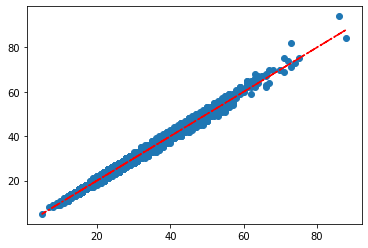

In [281]:
data=pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\ms2.csv")
plt.scatter(data['PeptidesPassedNEHfilters.T_NEH'],data['PeptidesPassedNEHfilters.APE_NEH'])
plt.plot(data['PeptidesPassedNEHfilters.T_NEH'],data['PeptidesPassedNEHfilters.T_NEH'],ls="-.",c='r')

In [22]:
np.mean(data['PeptidesPassedNEHfilters.T_NEH'] -data['PeptidesPassedNEHfilters.APE_NEH'])

-0.14813594242184708

In [21]:
np.std(data['PeptidesPassedNEHfilters.T_NEH'] -data['PeptidesPassedNEHfilters.APE_NEH'])

1.4554250744918085

In [ ]:
4,2,2,4,1,2,3,1,1,1,1,2,3,4,4,3,0,1,0,1


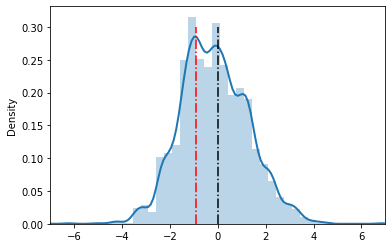

In [96]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
bw=0.15
bins=60
lw=2
mtd="scott"
sns.distplot(data['PeptidesPassedNEHfilters.T_NEH'] -data['PeptidesPassedNEHfilters.APE_NEH'], 
             hist = True,bins=bins, kde = True,
                 hist_kws={'alpha':0.3},
                     kde_kws = {'shade': False, 'linewidth': lw,'bw':bw,'bw_method':mtd} ,
             label="")
plt.xlim([-7,7])
plt.vlines(x=0,ymin=0,ymax=0.3,ls="-.",color='k')
plt.vlines(x=-0.90000153,ymin=0,ymax=0.3,ls="-.",color='r')